In [1]:
# Import the Earth Engine Python Package
import ee

# Import Dependencies
import pandas as pd
import matplotlib.dates as mdates
from IPython.display import Image
from datetime import datetime
from matplotlib import dates
from pylab import *

ee.Initialize()

In [5]:
# set variables
SCALE = 10;
polarization = 'VV'; # vertical/vertical or vertical/horizontal

# Initialization using point and buffer

In [6]:
# Create point in the area of interest
point = {'type':'Point', 'coordinates':[106.81235347345819, -6.365391437101752]};

In [8]:
# initiate google earth engine to aquire the image
S1 = ee.ImageCollection('COPERNICUS/S1_GRD')\
.filterDate('2016-01-01', '2019-12-12')\
.filter(ee.Filter.listContains('transmitterReceiverPolarisation', polarization))\
.filter(ee.Filter.eq('instrumentMode', 'IW'))\
.filter(ee.Filter.eq('orbitProperties_pass', 'DESCENDING'))\
.select(polarization)\
.filterBounds(point);

In [9]:
# Retrieve information over image collection if area to large add: {'maxPixels' : 1050000}
info = S1.getRegion(point,10).getInfo()

In [10]:
# Reshape image collection 
header = info[0]
data = array(info[1:])

# convert time stamp into understanable format
iTime = header.index('time')
time = [datetime.datetime.fromtimestamp(int(float(i))/1000) for i in (data[0:,iTime])]

# List of used image bands
band_list = ['VV']

iBands = [header.index(b) for b in band_list]
yData = data[0:,iBands].astype(np.float)

In [11]:
# Reshape NDVI array into Pandas Dataframe
df = pd.DataFrame(data=yData, index=list(range(len(yData))), columns=['Radar reflectance value'])
df = df.interpolate()
df['DateTime'] = pd.Series(time, index=df.index)

In [12]:
df = df.sort_values('DateTime')

In [13]:
df.head(10)

,Radar reflectance value,DateTime
0,-4.934412,2016-02-25 05:33:19.610
1,-5.951010,2016-03-20 05:33:20.000
2,-10.239272,2016-04-13 05:33:20.940
3,-7.427982,2016-05-31 05:33:23.300
4,-8.440753,2016-07-18 05:33:25.990
5,-6.442109,2016-08-11 05:33:27.210
6,-7.944922,2016-09-04 05:33:28.370
7,-6.576819,2016-09-28 05:33:29.300
8,-6.888875,2016-10-22 05:33:29.000
9,-7.658440,2016-11-15 05:33:29.080


/home/chris/anaconda3/envs/GCW_1/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


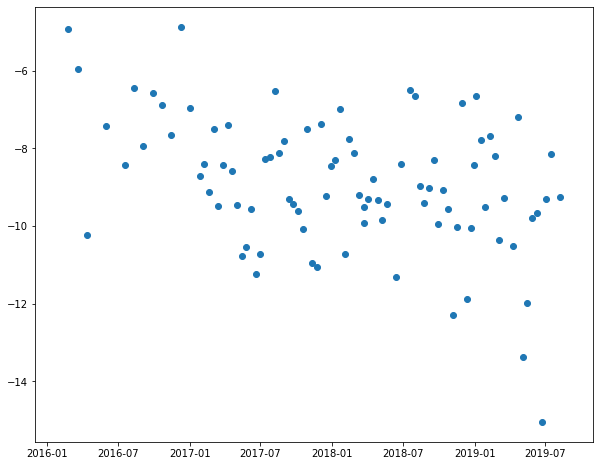

In [14]:
# Plot Time-Series for the selected location
plt.figure(figsize=(10,8))
plt.scatter(df['DateTime'], df['Radar reflectance value'])

plt.show()